<a href="https://colab.research.google.com/github/EvilNerd28/heart-disease-prediction-EDA-/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Reading Dataset

In [ ]:
df = pd.read_csv('/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#Exploratory Data Analysis

In [ ]:
def libraries():
    global pd,np
    import pandas as pd
    import numpy as np
def load():
    global df
    df=pd.read_csv('/heart_failure_clinical_records_dataset.csv')

def top_rows(value):
    print('\033[1m'+ 'displaying the', value, 'rows from top'+'\033[0m')
    a=df.head(value)
    print(a,'\n')

def bottom_rows(value):
    print('\033[1m'+'displaying the', value, 'rows from bottom'+'\033[0m')
    b=df.tail(value)
    print(b,'\n')

def rows_columns():
    print('\033[1m'+'Shape of the Data set'+'\033[0m')
    c=df.shape
    print(c,'\n')

def col_names():
    print('\033[1m'+'Column Names in the Data set'+'\033[0m')
    d=df.columns
    print(d,'\n')

def information():
    print('\033[1m'+'Quick Overview of DataSet(info)'+'\033[0m')
    e = df.info()
    print(e,'\n')

def sizee():
    print('\033[1m'+'No.of Elements in the DataSet'+'\033[0m')
    f = df.size
    print(f,'\n')

def ndimension():
    print('\033[1m'+'Dimensions in your dataframe'+'\033[0m')
    g = df.ndim
    print(g,'\n')

def stats_summary():
    print('\033[1m'+'Staistical Summary of DataSet'+'\033[0m')
    h = df.describe()
    print(h,'\n')

def null_values():
    print('\033[1m'+'Number of Missing values in each column'+'\033[0m')
    i = df.isnull().sum()
    print(i,'\n')

def n_unique():
    print('\033[1m'+'Number of unique elements'+'\033[0m')
    j = df.nunique()
    print(j,'\n')

def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')
    k = df.memory_usage()
    print(k,'\n')

def is_na(value):
    print('\033[1m'+'Dataframe filled with boolean values with true indicating missing values'+'\033[0m')
    l = df.isna().head(value)
    print(l,'\n')

def duplicate():
    print('\033[1m'+'Boolean Series denoting duplicate rows'+'\033[0m')
    m = df.duplicated().sum()
    print(m,'\n')

def valuecounts():
    print('\033[1m'+'Series containing count of unique values'+'\033[0m')
    n = df.value_counts()
    print(n,'\n')

def datatypes():
    print('\033[1m'+'Datatype of each column'+'\033[0m')
    o = df.dtypes
    print(o,'\n')

def correlation():
    print('\033[1m'+'Correalation between all columns in DataFrame'+'\033[0m')
    p = df.corr()
    print(p,'\n')

def nonnull_count():
    print('\033[1m'+'Count of non-null values'+'\033[0m')
    q = df.count()
    print(q,'\n')

def eda():
    load()
    value= 5
    datatypes()
    top_rows(value)
    bottom_rows(value)
    rows_columns()
    col_names()
    information()
    sizee()
    ndimension()
    stats_summary()
    null_values()
    n_unique()
    memory_use()
    is_na(value)
    nonnull_count()
    duplicate()
    valuecounts()
    correlation()




def stats_u(data,col):
    if data[col].dtype == "float64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        max_value = data[col].max()
        print('Maximum value of',col,'column',max_value)
        min_value = data[col].min()
        print('Minimum value of',col,'column',min_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])

    elif data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print("Outliers are:")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
    else:
        print(col,'has Qualitative Data')
        z = df[col].mode()
        print('mode of',col,'column:\n',z)
        print('Count of mode is:\n',df[col].value_counts())
        print('Unique strings in',col,'are',data[col].nunique())
        if(data[col].nunique() == 1):
            print(col,'has same string')
        elif(data[col].nunique() == 2):
            print(col,'has binary strings')
        else:
            print(col,'has multi stings')


libraries()
eda()

print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of DataSet'+'\033[0m')
print('\033[1m'+'Name of the DataSet:'+'\033[0m','Heart Failure')
print('\033[1m'+'DataTypes in the DataSet:\n'+'\033[0m',df.dtypes)
print('\033[1m'+'Columns in DataSet:'+'\033[0m',df.columns)
print('\033[1m'+'Shape of DataSet:'+'\033[0m',df.shape)
print('\033[1m'+'Size of DataSet:'+'\033[0m',df.size)
print('\033[1m'+'Dimension of DataSet:'+'\033[0m',df.ndim)
print('\033[1m'+'Total Memory used in DataSet:'+'\033[0m',df.memory_usage().sum())
print('\033[1m'+'Total Number of missing values in DataSet:'+'\033[0m',df.isnull().sum().sum())
print('\033[1m'+'Total Number of Unique values in DataSet:'+'\033[0m',df.nunique().sum())
print('\033[1m'+'Total Number of non null values in DataSet:'+'\033[0m',df.count().sum())
print('\033[1m'+'Total Number of duplicate rows in DataSet:'+'\033[0m',df.duplicated().sum())
print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of Each Colomn'+'\033[0m')
print("\n")
cols=df.columns
cols
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(df,i)
    print("\n")

Datatype of each column
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object 

displaying the 5 rows from top
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_bl

# Data Visualization

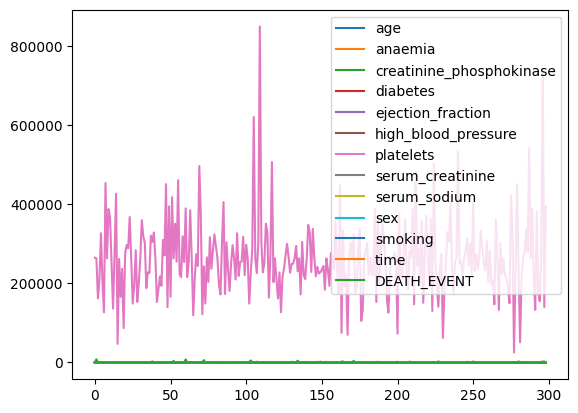

In [ ]:
df = df.plot()